## Predicting Catalog Demand



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from patsy import dmatrices

cust_df=pd.read_excel('data/p1-customers.xlsx')
mail_df=pd.read_excel('data/p1-mailinglist.xlsx')

display(cust_df.head())
display(mail_df.head())

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


## Predicting Average Sale Amount

In [2]:
cust_df[['ZIP','Store_Number']] = cust_df[['ZIP','Store_Number']].astype('str')
# Get the dependent variable
y = cust_df['Avg_Sale_Amount']
# Get the predictor variables 
choice = ['Customer_Segment','Avg_Num_Products_Purchased']
# Dummify variables
X = pd.get_dummies(cust_df[choice], columns=['Customer_Segment'], drop_first=True)

if True:
    mod = sm.OLS(y, X)
    res = mod.fit()
    print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:        Avg_Sale_Amount   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              5832.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):                        0.00
Time:                        23:45:02   Log-Likelihood:                         -15415.
No. Observations:                2375   AIC:                                  3.084e+04
Df Residuals:                    2371   BIC:                                  3.086e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------

In [3]:
m_variables = ['Customer_Segment', 'Avg_Num_Products_Purchased']
probs = mail_df[['Score_No','Score_Yes']]
X_mail = mail_df[m_variables]
# Get dummy variables
X_mail = pd.get_dummies(X_mail, columns=['Customer_Segment'], drop_first=True)
# Build final dataframe 'mail_dff'
mail_dff = mail_df[['Customer_Segment','Avg_Num_Products_Purchased','Score_No','Score_Yes']].copy()
mail_dff['Predicted_Avg_Sale_Amount'] = res.predict(X_mail)
mail_dff['Predicted_Avg_Sale_Amount'] = mail_dff['Predicted_Avg_Sale_Amount'] * mail_dff['Score_Yes']
mail_dff.head()

,Customer_Segment,Avg_Num_Products_Purchased,Score_No,Score_Yes,Predicted_Avg_Sale_Amount
0,Loyalty Club Only,3,0.694964,0.305036,101.666852
1,Loyalty Club and Credit Card,6,0.527275,0.472725,445.002012
2,Loyalty Club Only,7,0.421118,0.578882,429.672543
3,Loyalty Club Only,2,0.694862,0.305138,70.504258
4,Loyalty Club Only,4,0.612294,0.387706,168.858510


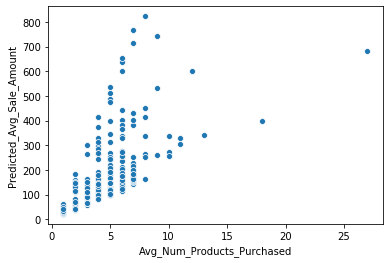

In [4]:
sns.scatterplot(x='Avg_Num_Products_Purchased',y='Predicted_Avg_Sale_Amount', data=mail_dff)
plt.show()

## Estimating Profits

In [5]:
gross_margin = 0.5 # average gross margin
cost = 6.50 # Cost of printing and sending catalog
mail_dff['Expected_Profit'] = (mail_dff['Predicted_Avg_Sale_Amount'] * gross_margin) - cost
expected_profit = round(mail_dff['Expected_Profit'].sum(),2)
print(f"From the model, we can expect a total profit of: ${expected_profit}")

From the model, we can expect a total profit of: $20852.09
